# ANZ VIRTUAL INTERNSHIP PROJECT

# TASK 1 : Exploratory Data Analysis

# 0. Import libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Read data

In [3]:
data = pd.read_excel("C:/Users/91949/Downloads/transaction.xlsx")
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


This dataset contains 3 months' worth of transactions for 100 customers which includes purchases, recurring transactions and salary transactions.

Let's see what all the columns are.

In [9]:
pd.DataFrame({"Columns": data.columns})


,Columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


status : denotes the status of the transaction posted or authorized for transaction.

card_present_flag : Did the customer have a card during the transaction (1.1 = Yes or 0.0 = No).

bpay_biller_code : unique code of the BPay Transaction done by the customer.

account : account number of the customers who made transaction.

currency : currency type in which the transaction has been done (AUD dollars).

long_lat : Longitude and Latitude location of the customer.

txn_description : the mode of transaction the customer has done.

merchant_id : the merchant id where the customers have done their transaction.

merChant_code : unique merchant code for each customer.

first_name : first name of the customer.

balance : balance the customer had during the transaction of period 3 months.

date : date when the transaction took place.

gender : gender of the customer(Male or Female).

age : age of the customer.

merchant_suburb : the district or city where the merchant is located.

merchant_state : the state where the merchant is located.

extraction : extraction of the transaction data.

amount : the amount transacted by the customer.

transaction_id : unique transaction id given by the merchant when the customer makes an transaction.

country : country where the customer's are located (Australia).

customer_id = id for the customer's to differentiate them as unique.

merchant_long_lat : the latitude and longitude location of the merchant.

movement : mode of transaction (credit or debit).

In [10]:
print("Data shape: ", data.shape)

Data shape:  (12043, 23)


# 2. Basic checks

# 2.1 Unique customers, unique transactions and 3 months of data

Before we explore each column individually, let's check for the following:

- 100 unique customers (customer_id)

- Each row corresponds to a unique transaction ID (transaction_id)

- 3 months worth of data (date)

In [12]:
print("Number of unique customer ID's: ", data.customer_id.nunique())

Number of unique customer ID's:  100


In [13]:
print("Number of rows in dataset: ", len(data))
print("Number of unique transaction ID's: ", data.transaction_id.nunique())

Number of rows in dataset:  12043
Number of unique transaction ID's:  12043


Number of unique transaction ID's correspond to the number of rows in the dataset which suggests that each row represent a single, unique transaction.

In [23]:
data.date.describe()

C:\Users\91949\AppData\Local\Temp\ipykernel_11448\3984613233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

We do have 3 months worth of data, starting from 1/8/2018 to 31/10/2018. However, there are only 91 unique days which means that there is one missing day.

In [24]:
data.date.describe(datetime_is_numeric=True)
#datetime_is_numeric=True IS TO AVOID ERROR

count                            12043
mean     2018-09-15 21:27:39.951839232
min                2018-08-01 00:00:00
25%                2018-08-24 00:00:00
50%                2018-09-16 00:00:00
75%                2018-10-09 00:00:00
max                2018-10-31 00:00:00
Name: date, dtype: object

In [25]:
pd.date_range(start = "2018-08-01", end = "2018-10-31").difference(data.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

# 2.2 Non-null count and data types

In [27]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

The info function provides information about the data types and presence of missing values in each column of the dataset.



# 2.3 Missing values

In [11]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing_percentage = round(missing / len(data), 4) * 100
pd.DataFrame({"Number of missing values": missing, "Percentage": missing_percentage}).sort_values(by = "Percentage", ascending = False)


,Number of missing values,Percentage
merchant_code,11160,92.67
bpay_biller_code,11158,92.65
card_present_flag,4326,35.92
merchant_id,4326,35.92
merchant_suburb,4326,35.92
merchant_state,4326,35.92
merchant_long_lat,4326,35.92


Both bpay_biller_code and merchant_code columns contain a significant number of missing values. We will deal with those missing values later.

Let's examine the summary statistics of the numerical columns in the dataset.

# 2.4 Descriptive statistics of numerical variables

In [29]:
data.describe()


,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


The describe function is a good way to observe any anomalies in the numerical columns for example, we can check if the age and amount columns contain any negative values, or if a customer has an age of 150 etc. Here, I do not see any anomalies.

It also provides an overview of some basic statistics for the amount column. However, we do not know the breakdown of these transaction amounts for example, what sort of transactions are they, who made them etc. We will explore this as we proceed with our further analysis.

We can see see a huge difference between the maximum and minimum amount in the balance and amount columns. We will look into this further.

# 3. Exploratory data analysis (EDA)

# 3.1 Categorical variables

Here, we will skip the following columns as they are merely identifiers(There won't be special cahr or number in front of name) and won't provide us with much information:

- bpay_biller_code
- account
- merchant_id
- merchant_code
- first_name
- transaction_id
- customer_id

# 3.1.1 Status

In [32]:
data.status.value_counts(dropna = False)
#Return a Series containing the frequency of each distinct row in the Dataframe.dropna(Don’t include counts of rows that contain NA values.


authorized    7717
posted        4326
Name: status, dtype: int64

Status of of the individual transactions: authorised means transaction has already been approved, posted means still in the process.

# 3.1.2 Card present flag

In [33]:
data.card_present_flag.value_counts(dropna = False)


1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

Card-not-present (CNP) transaction occurs when neither the cardholder nor the credit card is physically present at the time of the transaction. It's most common for orders that happen remotely over the phone, internet or mail.

# 3.1.3 Currency of transaction

In [34]:
data.currency.value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

All transactions are made in AUD. Can potentially drop this column because unnecessary since it does not provide us with any additional information.

# 3.1.4 Longitude and latitude

In [35]:
data.long_lat.head()


0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

These are the coordinates where the transactions were made.

# 3.1.5 Transaction description (types of transactions)

In [36]:
data.txn_description.value_counts(dropna = False)


SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

Text(0.5, 1.0, 'Number of transactions by category')

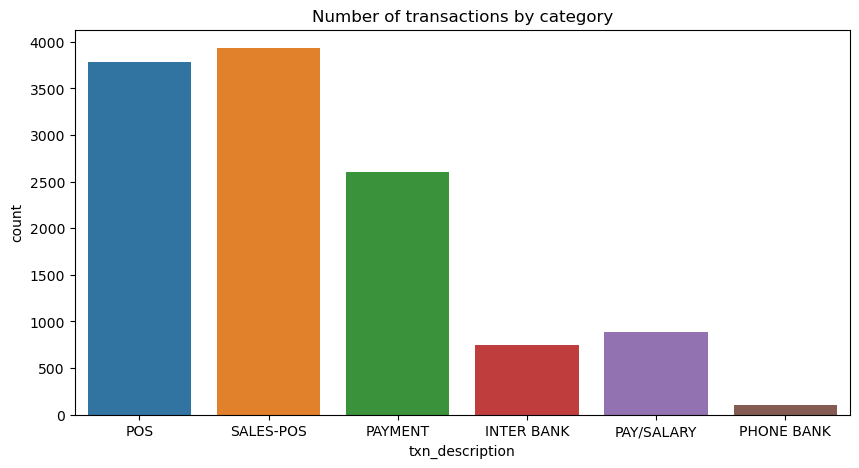

In [29]:
plt.figure(figsize = (10, 5))
sns.countplot(x='txn_description',data=data)
plt.title("Number of transactions by category")

These are the descriptions for each transaction. Transactions mostly consist of sales payment.

Also, this might explain the missing values in the merchant columns as not all transactions are purchases of goods and services from merchants. We can validate this later.

In [27]:
data[["txn_description", "amount"]].groupby("txn_description", as_index = False).mean().sort_values(by = "amount", ascending = False)


,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average transaction volume by category')

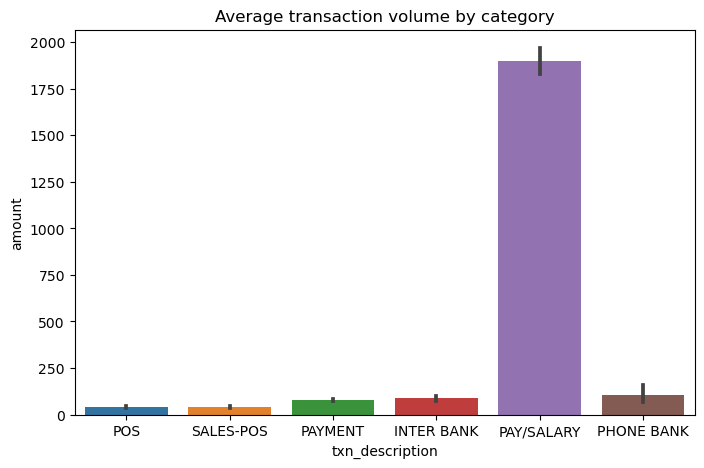

In [28]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "txn_description", y = "amount", data = data)
plt.title("Average transaction volume by category")

Pay/salary has the largest average transaction volume. Seems logical.

# 3.1.6 Gender

In [30]:
data.gender.value_counts(dropna = False)

M    6285
F    5758
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of transactions by gender')

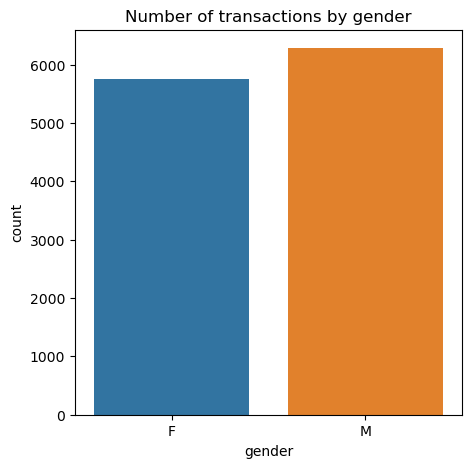

In [32]:
plt.figure(figsize = (5, 5))
sns.countplot(x='gender',data=data)
plt.title("Number of transactions by gender")

There are more male customer transactions than there are female.

In [34]:
data[["gender", "amount"]].groupby("gender", as_index = False).mean().sort_values(by = "amount", ascending = False)


,gender,amount
1,M,205.721809
0,F,168.517303


Text(0.5, 1.0, 'Average transaction volume by gender')

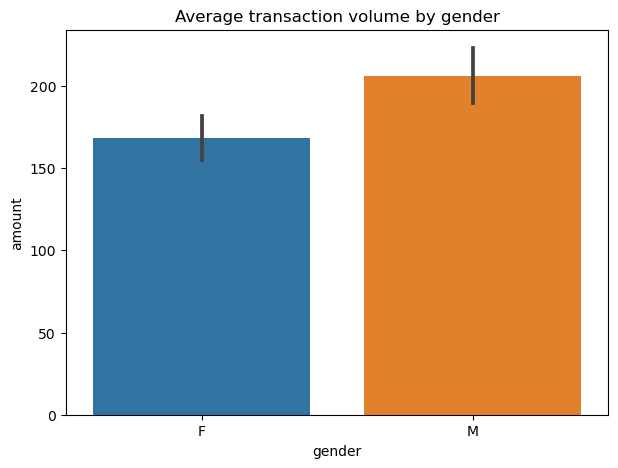

In [40]:
plt.figure(figsize = (7, 5))
sns.barplot(x = "gender", y = "amount", data = data)
plt.title("Average transaction volume by gender")

Male has a higher average transaction volume.

# 3.1.7 Merchant suburb

In [41]:
data.merchant_suburb.value_counts(dropna = False)


NaN                  4326
Melbourne             255
Sydney                233
Southport              82
Brisbane City          79
                     ... 
Cowell                  1
Tweed Heads South       1
Ballandean              1
Sydenham                1
Kings Park              1
Name: merchant_suburb, Length: 1610, dtype: int64

# 3.1.8 Merchant state

In [42]:
data.merchant_state.value_counts(dropna = False)


NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

Text(0.5, 1.0, 'Number of transactions by state')

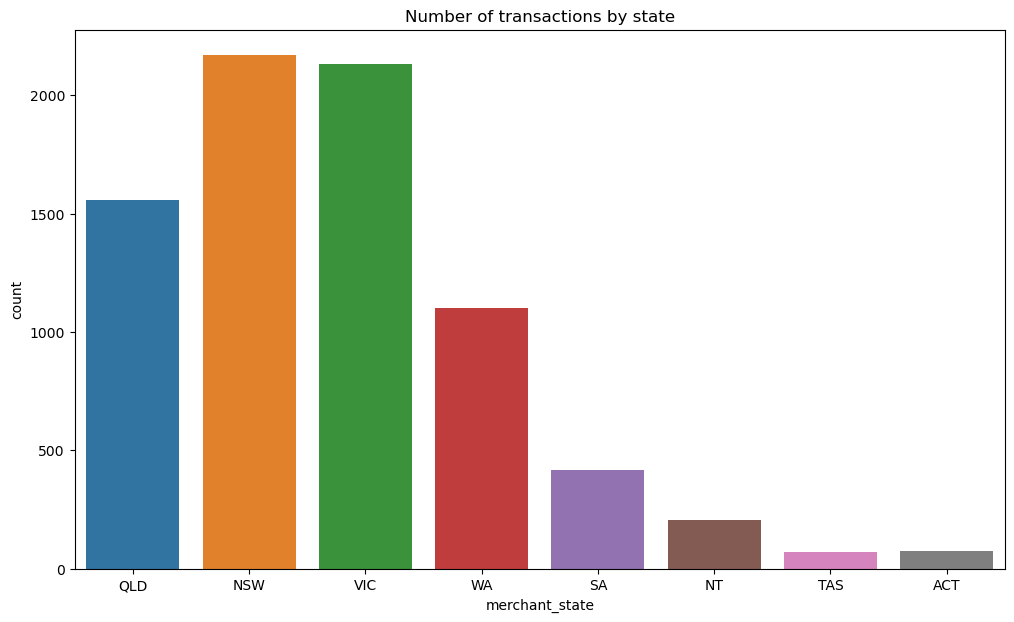

In [43]:
plt.figure(figsize = (12, 7))
sns.countplot(x='merchant_state',data=data)
plt.title("Number of transactions by state")

Similar to merchant suburb, these are the states where the transactions were made.

NSW and VIC are the top 2 states in number of transactions.

In [45]:
data[["merchant_state", "amount"]].groupby("merchant_state", as_index = False).mean().sort_values(by = "amount", ascending = False)


,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


Text(0.5, 1.0, 'Average transaction volume by state')

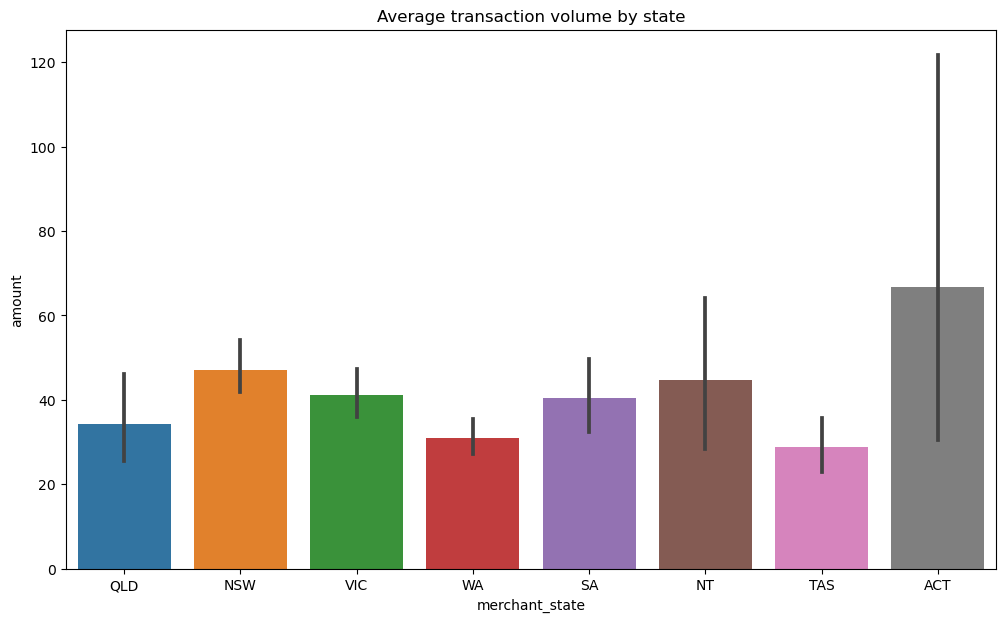

In [46]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "merchant_state", y = "amount", data = data)
plt.title("Average transaction volume by state")

ACT has the highest average transaction volume but the variance is quite large.

# 3.1.9 Movement (debit/credit)

In [47]:
data.movement.value_counts(dropna = False)


debit     11160
credit      883
Name: movement, dtype: int64

Text(0.5, 1.0, 'Number of transactions by movement')

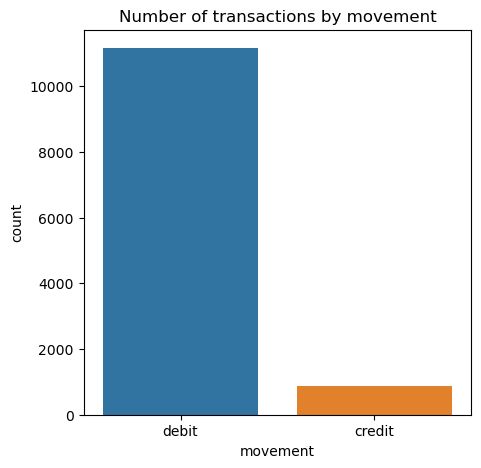

In [48]:
plt.figure(figsize = (5 ,5))
sns.countplot(x='movement',data=data)
plt.title("Number of transactions by movement")

Most transactions are overwhelmingly debit transactions.



Text(0.5, 1.0, 'Average transaction volume by movement')

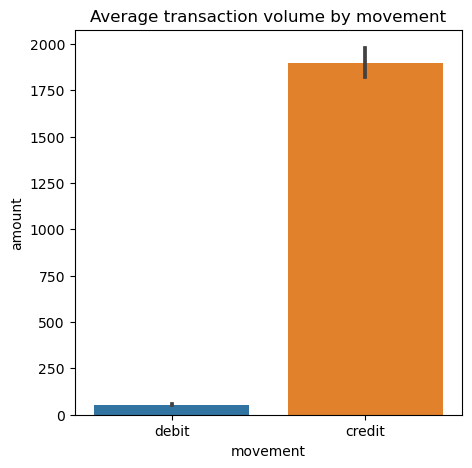

In [49]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "movement", y = "amount", data = data)
plt.title("Average transaction volume by movement")

However, the average transaction amount for credit transactions are much higher.

